# Instacart- Costumers Shopping Habits Analysis

These tables store all data regarding orders, products, and customers.  
The main goal of this analysis is to get a better understanding of the shopping habits of Instacart customers.  
All results are communicated by plots and brief explanations below.   
  
This analysis will include 5 data tables:
1. instacart_orders
2. products
3. departments  
4. aisles
5. order_products 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
# reading the data frame and checking for read errors
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
# reading the data frame and checking for read errors
products = pd.read_csv('/datasets/products.csv', sep=';')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
# reading the data frame and checking for read errors
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
# reading the data frame and checking for read errors
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# reading the data frame and checking for read errors
departments = pd.read_csv('/datasets/departments.csv', sep=';')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


All csv files above use semicolon (;) as separator.

## Find and remove duplicate values (and describe why you make your choices)

### orders data frame

In [7]:
# Taking a look into the dataframe
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
# Cheking for min and max values for order_dow and order_hour_of_day
instacart_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


It looks like the values for those columns are fine.
In the absence of further information, 0 will be Saturday (and Wednesday will be 4).

In [9]:
# Check for duplicated orders
instacart_orders.duplicated().sum()

15

In [10]:
# Finding duplicated rows
instacart_orders['duplicated'] = instacart_orders.duplicated()
instacart_orders[instacart_orders['duplicated'] == True]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
145574,794638,50898,24,3,2,2.0,True
223105,2160484,107525,16,3,2,30.0,True
230807,1918001,188546,14,3,2,16.0,True
266232,1782114,106752,1,3,2,NaN,True
273805,1112182,202304,84,3,2,6.0,True
284038,2845099,31189,11,3,2,7.0,True
311713,1021560,53767,3,3,2,9.0,True
321100,408114,68324,4,3,2,18.0,True
323900,1919531,191501,32,3,2,7.0,True
345917,2232988,82565,1,3,2,NaN,True


There are 15 obvious duplicated rows.  
All of them occured on day 3 (Tuesday) at 2:00 AM.  
It could be that there was a problem with the system or this is the time when software updates are usually performed.

In [11]:
# Orders placed Wednesday at 2:00 AM
instacart_orders[(instacart_orders['order_dow'] == 4) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
2124,401544,80955,72,4,2,2.0,False
14847,1913472,138992,16,4,2,6.0,False
16116,2796392,154904,12,4,2,13.0,False
16471,2209130,72786,5,4,2,30.0,False
32120,2235095,89980,18,4,2,7.0,False
...,...,...,...,...,...,...,...
467118,3210362,51765,22,4,2,5.0,False
470642,2205284,121327,33,4,2,2.0,False
472604,2101463,60877,6,4,2,30.0,False
477497,776659,111694,9,4,2,15.0,False


In [12]:
# Orders placed Tuesday at 2:00 AM
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
4838,2766110,162084,41,3,2,16.0,False
5156,2190225,138285,18,3,2,11.0,False
15506,553049,58599,13,3,2,7.0,False
18420,382357,120200,19,3,2,11.0,False
24691,690242,77357,2,3,2,9.0,False
...,...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0,False
458816,910166,164782,18,3,2,4.0,False
459635,1680532,106435,6,3,2,21.0,False
468324,222962,54979,59,3,2,3.0,False


In [13]:
# Remove duplicate orders
instacart_orders.drop_duplicates(subset=['order_id'], inplace=True, ignore_index=True)

Because I addes a new column (duplicated) to the dataframe the rows are no longer duplicated, and they differ in this column.

In [14]:
# Double check for duplicate rows
instacart_orders.duplicated().sum()

0

In [15]:
# Double check for duplicate order IDs only
instacart_orders.duplicated(subset=['order_id']).sum()

0

### products data frame

In [16]:
# Taking a look into the dataframe
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [18]:
# Check for just duplicate product IDs
products.duplicated(subset=['product_id']).sum()

0

In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [20]:
# Check for duplicate product names that aren't missing
products.dropna()['product_name'].str.lower().duplicated().sum()

104

Duplicated rows can not be removed based on duplicated names.  
The store need to place a procedure to reduce the duplicates over time or to make another dataframe with old product ID's.

### departments data frame

In [21]:
# Taking a look into the dataframe
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [22]:
# Check for fully duplicate rows
departments.duplicated().sum()

0

### aisles data frame

In [23]:
# Taking a look into the dataframe
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
# Check for fully duplicate rows
aisles.duplicated().sum()

0

### order_products data frame

In [25]:
# Taking a look into the dataframe
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [26]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [27]:
# Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

We have 5 tables in this analysis:
1. instacart_orders-  
    missing values in 'days_since_prior_order' (only for first purchases).  
    duplicated orders were removed.  
2. products-  
    missing values and duplicates in 'product_name'.  
3. departments-  
    no missing values and no duplicates.  
4. aisles-  
    no missing values and no duplicates.     
5. order_products-  
    missing values in 'add_to_cart_order'.  
    no duplicates were found.

## Find and remove missing values


### products data frame

In [28]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [29]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [30]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


All missing names belong to department 21, isle 100.

In [31]:
# What is this ailse and department?
print(aisles[aisles['aisle_id'] == 100].to_string(index=False))

 aisle_id   aisle
      100 missing


In [32]:
# What is this ailse and department?
print(departments[departments['department_id'] == 21].to_string(index=False))

 department_id department
            21    missing


In [33]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

In [34]:
# Chekong again fo missing values in product_name
products['product_name'].isna().sum()

0

In [35]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


All missing names in this column were replaced with 'Unknown'.

### orders data frame

In [36]:
# Taking a look into the dataframe
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
 6   duplicated              478952 non-null  bool   
dtypes: bool(1), float64(1), int64(5)
memory usage: 22.4 MB


In [37]:
# Are there any missing values where it's not a customer's first order?
instacart_orders[(instacart_orders['order_number'] != 1) & (instacart_orders['days_since_prior_order'].isna())]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated


All missing values in column 'days_since_prior_order' are for first purchases.
We'll decide later if any manipulation is required.

### order_products data frame

In [38]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [39]:
# What are the min and max values in this column?
print(f'The min value is {order_products.add_to_cart_order.min()}, and the max value is {order_products.add_to_cart_order.max()}')

The min value is 1.0, and the max value is 64.0


In [40]:
# Finding order IDs with missing value in 'add_to_cart_order'
missing_df = order_products[order_products['add_to_cart_order'].isna()]
missing_df

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [41]:
## Correction
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_missing = missing_df['order_id'].unique()
order_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [42]:
## Correction
# Data frame - orders with at least one missing value in 'add_to_cart_order' 
order_products_missing = order_products[order_products.order_id.isin(order_missing)]
order_products_missing.sort_values(by=['order_id', 'add_to_cart_order'], ascending=False, na_position='first')

,order_id,product_id,add_to_cart_order,reordered
1038616,3383594,15424,NaN,1
1537276,3383594,15076,NaN,0
2772397,3383594,46710,NaN,0
3760909,3383594,63,NaN,0
3784932,3383594,49144,NaN,1
...,...,...,...,...
990652,9310,42828,5.0,0
1806792,9310,18523,4.0,1
3148360,9310,27966,3.0,1
2160215,9310,20082,2.0,1


In [43]:
## Correction
# Do all orders with missing values have more than 64 products?
order_products_missing.groupby(by='order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [44]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999').astype(int)
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


None of the orders with missing values has 64 or more items.  
I feel like I am missing something in this question.  
------Correction  
All orders with missing values in 'add_to_cart_order' column have 64 or more items.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [45]:
# Verify that the 'order_hour_of_day' value in the orders tables are sensible 
print(f'order hour of day ranges between {instacart_orders.order_hour_of_day.min()} to {instacart_orders.order_hour_of_day.max()}')

order hour of day ranges between 0 to 23


In [46]:
# Verify that the 'order_dow' values in the orders tables are sensible
print(f'order day of week ranges between {instacart_orders.order_dow.min()} to {instacart_orders.order_dow.max()}')

order day of week ranges between 0 to 6


### [A2] What time of day do people shop for groceries?

In [47]:
# Sorting order hour descending 
instacart_orders.order_hour_of_day.value_counts(sort=True)

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64

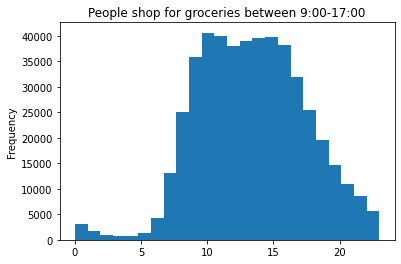

In [48]:
# A plot that shows how many people place orders for each hour of the day. 
instacart_orders.order_hour_of_day.plot(kind='hist', title='People shop for groceries between 9:00-17:00', bins=24)
plt.show()

People shop during all day.  
peak hours are between 9:00-17:00 with more than 30K orders per hour.

### [A3] What day of the week do people shop for groceries?

In [49]:
# Sorting order day of week descending 
instacart_orders.order_dow.value_counts(sort=True)

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

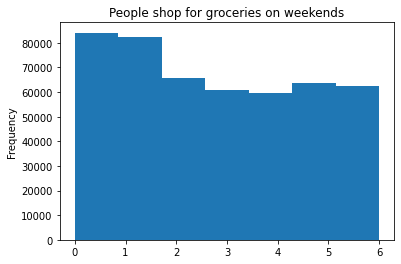

In [50]:
# A plot that shows what day of the week people shop for groceries
instacart_orders.order_dow.plot(kind='hist', title='People shop for groceries on weekends', bins=7)
plt.show()

People shop during all week days.  
peak days are Saturday and Sunday with more than 80K orders per hour.  
(Assuming 0 is Saturday)

### [A4] How long do people wait until placing another order?

In [51]:
# Sorting days since prior order descending 
instacart_orders.days_since_prior_order.value_counts(sort=True)

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

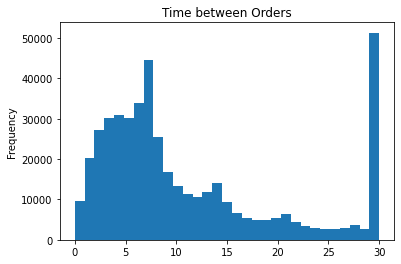

In [52]:
# A plot that shows how long people wait until placing their next order.
instacart_orders.days_since_prior_order.plot(kind='hist', title='Time between Orders', bins=31)
plt.show()

The min value is 0, meaning that some customers place more than one order per day.  
The max value is 30- most of the customers wait a month before placing another order.  
The most common values are 30 days (for more than 51K orders), and 7 days (for more than 44K orders)

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [53]:
# Preparing a dataframe and making sure it is what it's meant to be 
df_saturdays = instacart_orders[instacart_orders['order_dow'] == 0]
df_saturdays.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
3,1768857,82516,56,0,20,10.0,False
5,1843871,20084,5,0,11,15.0,False
7,2521283,97711,2,0,18,22.0,False
23,3406282,19356,21,0,0,14.0,False
25,1895419,169793,2,0,11,8.0,False


In [54]:
# Preparing a dataframe and making sure it is what it's meant to be 
df_wednesdays = instacart_orders[instacart_orders['order_dow'] == 4]
df_wednesdays.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
4,3007858,196724,2,4,12,17.0,False
9,446014,15356,2,4,8,10.0,False
10,1162566,43738,33,4,11,2.0,False
17,727519,146663,7,4,22,11.0,False
21,3097921,97319,40,4,9,8.0,False


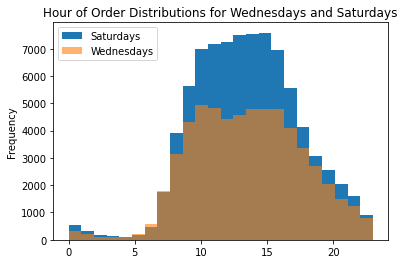

In [55]:
# A plot showing the distribution of time of order for wednesdays and saturdays
df_saturdays.order_hour_of_day.plot(kind='hist', title='Hour of Order Distributions for Wednesdays and Saturdays', bins=24)
df_wednesdays.order_hour_of_day.plot(kind='hist', alpha=0.6, bins=24)
plt.legend(['Saturdays', 'Wednesdays'])
plt.show()

In [56]:
# Sorting order hour for Saturdays descending 
df_saturdays.order_hour_of_day.value_counts()

15    7585
14    7533
13    7483
12    7231
11    7186
10    6978
16    6956
9     5650
17    5552
18    4142
8     3908
19    3084
20    2544
21    2043
7     1752
22    1614
23     921
0      533
6      463
1      337
2      188
5      171
3      128
4      108
Name: order_hour_of_day, dtype: int64

In [57]:
# Sorting order hour for Wednesdays descending 
df_wednesdays.order_hour_of_day.value_counts()

10    4938
11    4842
14    4795
15    4795
16    4788
13    4567
12    4433
9     4332
17    4089
18    3379
8     3136
19    2691
20    2037
7     1787
21    1506
22    1236
23     791
6      594
0      324
1      229
5      198
2      114
3      109
4      100
Name: order_hour_of_day, dtype: int64

The max values change between the days (On Wednesdays the peak hour is 10:00, and on Saturdays it is 15:00).  
However, the overall shape (distribution) of the graphs is similar.

### [B2] What's the distribution for the number of orders per customer?

In [58]:
## Correction
# Sorting order number descending 
instacart_orders.groupby('user_id')['order_id'].count()

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

In [59]:
## Correction
# Getting basic statistics for the data
instacart_orders.groupby('user_id')['order_id'].count().describe()

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64

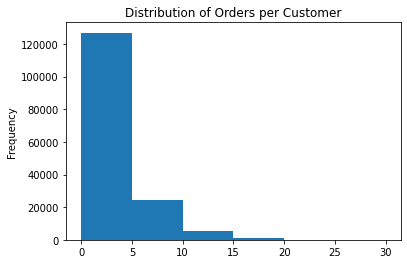

In [60]:
## Correction
instacart_orders.groupby('user_id')['order_id'].count().plot(kind='hist', bins=[0,5,10,15,20,25,30], title='Distribution of Orders per Customer')
plt.show()

28k customers palced only 1 order, and 169 customers palced 99 orders-  
A large number of customers placed a small number of orders, and a small number of customers placed a large number of orders.  
---  Correction
More than 120K costumers made up to 5, and over 20K made between 5-10 orders. 

Not sure about this question.  
How can I check if the data is cumulative? (a costumer who made 100 orders will be counted also as 0-99 orders?)  
Sorting order number descending suggest that the data is not cumulative.

### [B3] What are the top 20 popular products (display their id and name)?

In [61]:
# finding and saving 20 top value counts for product ID
top20_products = order_products.product_id.value_counts().head(20)
top20_products

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64

In [62]:
# Converting series to df and naming column
top20_products_df = top20_products.index.to_frame(index=False, name='product_id')
top20_products_df

,product_id
0,24852
1,13176
2,21137
3,21903
4,47209
5,47766
6,47626
7,16797
8,26209
9,27845


I dont remember learning this (to_frame/index.to_frame).  
Is there a better way for this task?

In [63]:
# Merging the data frames to get top 20 products name and ID 
merged_top20 = top20_products_df.merge(products, on='product_id').drop(['aisle_id', 'department_id'], axis='columns')
merged_top20

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [64]:
# Counting items per order, converting the data to data frame, and getting info for the new data frame.
items_per_order = order_products.groupby(['order_id']).product_id.count()
items_per_order = items_per_order.to_frame(name='items_in_order')
items_per_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450046 entries, 4 to 3421079
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   items_in_order  450046 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [65]:
# Describing the new data frame
items_per_order.describe()

,items_in_order
count,450046.000000
mean,10.098983
std,7.540206
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,127.000000


In [66]:
print(f"The mean value is {items_per_order.items_in_order.mean():.1f}, and the median value is {items_per_order.items_in_order.median():.1f}")

The mean value is 10.1, and the median value is 8.0


In [67]:
print(f"The min value is {items_per_order.items_in_order.min()}, and the max value is {items_per_order.items_in_order.max()}")

The min value is 1, and the max value is 127


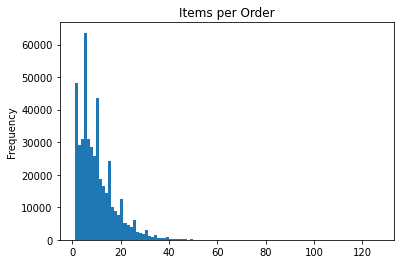

In [68]:
# A plot of number of items per order
items_per_order.items_in_order.plot(kind='hist', bins=100, title='Items per Order')
plt.show()

In [69]:
# In the plot it looks like there are outliers
items_per_order.items_in_order.quantile([0.9, 0.95, 0.99, 0.995, 0.999])

0.900    20.0
0.950    25.0
0.990    35.0
0.995    40.0
0.999    50.0
Name: items_in_order, dtype: float64

In [70]:
# getting rid of outliers (data will include purcheses with no more than 50 items)
order_products_no_outliers = items_per_order[items_per_order['items_in_order'] <= 50]
order_products_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449617 entries, 4 to 3421079
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   items_in_order  449617 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


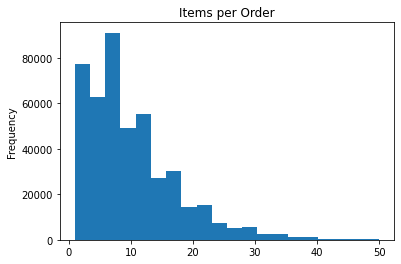

In [71]:
# A plot of number of items per order- no outliers
order_products_no_outliers.items_in_order.plot(kind='hist', bins=20, title='Items per Order')
plt.show()

When working with real data it is inportant to fully understand the couse for outliers before making any change.  
The original data can never be deleted.

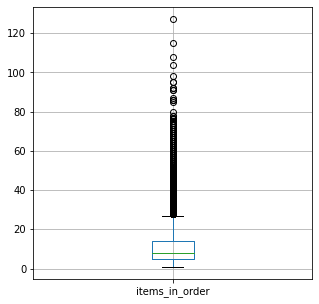

In [72]:
## Correction
items_per_order.boxplot(figsize=(5,5))
plt.show()

As suggested I made a boxplot.  
It is truelly interesting to see all the ourliers, although it seems a bit aggresive to filter them out.  
I guess it could be explained with over time changes that can occur in non-static data or by habing different costumers (private vs bussiness).

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [73]:
# getting data of 20 top reorderd items(product ID)
top20_reorder = order_products[order_products['reordered'] == 1].product_id.value_counts().head(20)
top20_reorder

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64

In [74]:
# Converting to data Frame
top20_reorder_df = top20_reorder.index.to_frame(index=False, name='product_id')
top20_reorder_df

,product_id
0,24852
1,13176
2,21137
3,21903
4,47209
5,47766
6,27845
7,47626
8,27966
9,16797


In [75]:
# merging data to get top 20 reordered items name and ID
top20_reorder_df = top20_reorder_df.merge(products, on='product_id').drop(['aisle_id', 'department_id'], axis='columns')
top20_reorder_df

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [76]:
# Total number of orders for each product
#total_orders = order_products.product_id.value_counts()
#total_orders

In [77]:
# Total number of orders for each product with product ID as data frame
total_orders = order_products.product_id.value_counts().to_frame(name='number_of_orders').reset_index()
total_orders = total_orders.rename(columns={'index': 'product_id'})
total_orders

,product_id,number_of_orders
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
...,...,...
45568,10543,1
45569,5222,1
45570,2347,1
45571,11893,1


In [78]:
# Number of reorders for each product
reorderes = order_products[order_products['reordered'] == 1].product_id.value_counts().to_frame(name='number_of_reorders').reset_index()
reorderes = reorderes.rename(columns={'index': 'product_id'})
reorderes

,product_id,number_of_reorders
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,2591,1
36224,29201,1
36225,27154,1
36226,10789,1


In [79]:
# Merging the 2 data frames
total_orders = total_orders.merge(reorderes, on='product_id', how='left')
total_orders

,product_id,number_of_orders,number_of_reorders
0,24852,66050,55763.0
1,13176,53297,44450.0
2,21137,37039,28639.0
3,21903,33971,26233.0
4,47209,29773,23629.0
...,...,...,...
45568,10543,1,NaN
45569,5222,1,NaN
45570,2347,1,NaN
45571,11893,1,NaN


In [80]:
# Calculating and adding reorder proportion for each product
total_orders['proportion of reorders'] = total_orders['number_of_reorders'] / total_orders['number_of_orders']
total_orders

,product_id,number_of_orders,number_of_reorders,proportion of reorders
0,24852,66050,55763.0,0.844254
1,13176,53297,44450.0,0.834006
2,21137,37039,28639.0,0.773212
3,21903,33971,26233.0,0.772217
4,47209,29773,23629.0,0.793639
...,...,...,...,...
45568,10543,1,NaN,NaN
45569,5222,1,NaN,NaN
45570,2347,1,NaN,NaN
45571,11893,1,NaN,NaN


In [81]:
## Correction
# Cleaning data frame and leaving just needed information
total_orders = total_orders.drop(['number_of_orders', 'number_of_reorders'], axis='columns').fillna(0)
total_orders

,product_id,proportion of reorders
0,24852,0.844254
1,13176,0.834006
2,21137,0.773212
3,21903,0.772217
4,47209,0.793639
...,...,...
45568,10543,0.000000
45569,5222,0.000000
45570,2347,0.000000
45571,11893,0.000000


Thank you so much for this comment, much shorter way!
Also kept my long way and filled missing values with 0.

In [82]:
order_products.groupby('product_id')['reordered'].mean().reset_index().rename(columns={'reordered': 'reordered_proportion'})

,product_id,reordered_proportion
0,1,0.564286
1,2,0.000000
2,3,0.738095
3,4,0.510204
4,7,0.500000
...,...,...
45568,49690,0.800000
45569,49691,0.430556
45570,49692,0.416667
45571,49693,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [83]:
# Merging data so 'reordered' and 'user_id' will be in same table
# (drop can be used to clean this table from unnecessary columns)
order_costumer = order_products.merge(instacart_orders, on=['order_id'])
order_costumer

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,duplicated
0,2141543,11440,17,0,58454,25,0,15,8.0,False
1,2141543,31869,15,1,58454,25,0,15,8.0,False
2,2141543,30233,9,1,58454,25,0,15,8.0,False
3,2141543,27966,20,1,58454,25,0,15,8.0,False
4,2141543,13176,2,1,58454,25,0,15,8.0,False
...,...,...,...,...,...,...,...,...,...,...
4545002,1790509,43739,1,1,60894,9,2,21,18.0,False
4545003,1274005,38275,1,1,32958,7,5,17,1.0,False
4545004,812418,46149,1,1,130466,34,1,14,0.0,False
4545005,2666881,196,1,1,33946,12,1,8,17.0,False


In [84]:
# Table of users and reordered items proportion
costumer_reorder = order_costumer.groupby('user_id')['reordered'].mean().reset_index().rename(columns={'reordered': 'reordered_proportion'})
costumer_reorder

,user_id,reordered_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


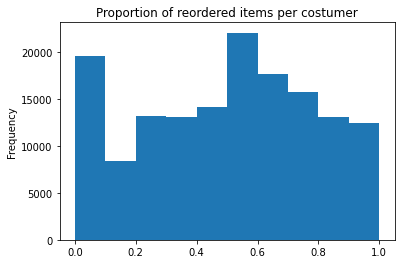

In [85]:
# plotting for visualization
costumer_reorder.reordered_proportion.plot(kind='hist', title='Proportion of reordered items per costumer')
plt.show()

### [C5] What are the top 20 items that people put in their carts first? 

In [86]:
# Finding 20 top items that people put in their carts first
top20_first = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20).reset_index().rename(columns={'index':'product_id','product_id':'count'})
top20_first

,product_id,count
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [87]:
# Merging all necessary data
top20_first.merge(products, on=['product_id'], how='left').drop(['aisle_id', 'department_id'], axis='columns')

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


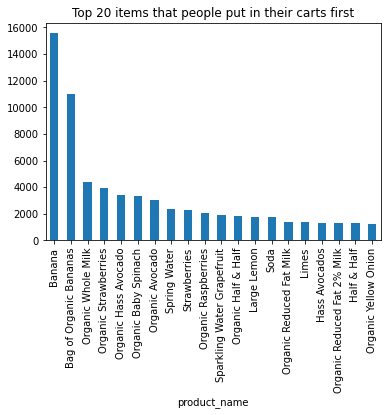

In [88]:
# plotting for visualization
top20_first.merge(products, on=['product_id'], how='left').drop(['aisle_id', 'department_id'], axis='columns').plot(x='product_name', y='count', kind='bar', legend=False, title='Top 20 items that people put in their carts first')
plt.show()

Looks like people put in their cart first fruits and vegies, dairy products, and also some beverages.  
Maybe it has something to do with the design of the website? Monkey sanctuary nearby?